The file "Abalone.xlsx" stores the number of rings of two types of abalones (Female and Infant).

**Part a:** Plot the normalized histogram of the number of rings for all the data without regard to abalone type from 0 to 30 with bin size 1. The normalized histogram can be computed by the count in each bin by the number of observations times the bin width. In python, this can be selected by passing "density=True" into the **matplotlib.pyplot.hist** or **pandas.DataFrame.hist** functions.

Text(0, 0.5, 'Number of Rings')

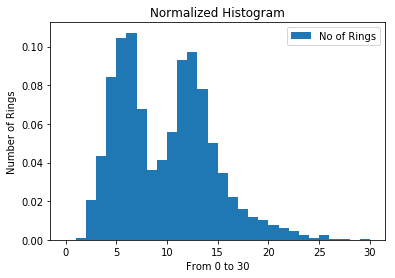

In [4]:
# Put your code here
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel('Abalone.xlsx', index_col = 'Index')
# data = pd.read_excel('Abalone.xlsx')
data.plot.hist(bins = np.arange(0,30+1,1), density = True)
plt.title('Normalized Histogram')
plt.xlabel('From 0 to 30')
plt.ylabel('Number of Rings')

**Part b:** Calculate empirical mean $m$ and standard deviation $\sigma$ of the number of rings. For a set of data $\{r_1,r_2,⋯,r_n\}$, these can be computed by: $m=\frac{1}{n}\sum_{i=1}^{n}r_i$ and $\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i-m)^2}$

In [5]:
# Put your code here 
sum = 0
sumSq = 0
mean = 0
var = 0
std = 0
N = data.count()
for index, row in data.iterrows():
    ring = row['No of Rings']
    sum += int(ring)
mean = sum/N
print("mean = ")
print(mean)

for index, row in data.iterrows():
    ring = row['No of Rings']
    sumSq += (ring - mean)*(ring-mean)
var = sumSq/(N-1)
std = np.sqrt(var)
print("std = ")
print(std)

mean = 
Type           9.377934
No of Rings    9.377934
dtype: float64
std = 
Type           4.580436
No of Rings    4.580436
dtype: float64


**Part c:** Assume that the probability density function of the number of rings, $f_R(r)$, is given by a Gaussian distribution with mean and standard deviation computed above. You can compute values of the Gaussian distribution in python using the scyipy.stats.norm.pdf function. Note that the Gaussian distribution is also called the normal distribution.

Compare the normalized histogram in **Part a** with the plot of $f_R(r)$ by plotting both together in the same figure for $r$ from 0 to 30. Does this look like a good model of the data? 

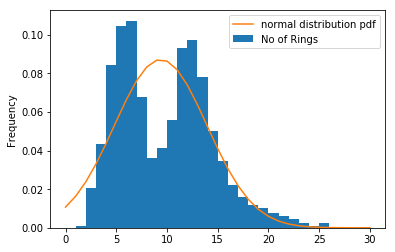

In [28]:
x = np.arange(0, 30+1, 1)
mu = 9.377934
sigma = 4.580436

y_pdf = scipy.stats.norm.pdf(x, mu, sigma) # the normal pdf
data.plot.hist(bins = np.arange(0,30+1,1), density = True)
plt.plot(x, y_pdf, label = 'normal distribution pdf')
plt.legend()

**Your analysis of Part c**:
Not quite good, fits the rightmost end, but not for the regions near the mean, superposition of two normal distribution may fit better.

**Part d:** Now generate plots of normalized histogram of the number of rings for each abalone type separately.

Text(0, 0.5, 'The density')

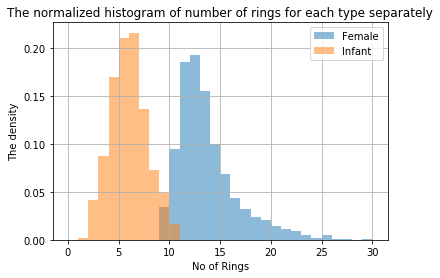

In [29]:
# Put your code here
groups = data.groupby('Type')['No of Rings']
b = np.arange(0, 30+1, 1)
fig, ax = plt.subplots()
for name, group in groups:
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax=ax)
    
    ax.legend()
plt.title('The normalized histogram of number of rings for each type separately')
plt.xlabel('No of Rings')
plt.ylabel('The density')

**Part e:** Compute the empirical conditional mean and conditional variance of the number of rings for each abalone type using the same equation as in **Part b** except the summations only contain data for each abalone type. In Python, you can do this automatically using “groupby”.

In [55]:
# Put your code here
typegroup = data.groupby('Type')['No of Rings']
mean_by_type = typegroup.mean()
var_by_type = typegroup.var()
print('mean =  ')
print(mean_by_type)
print('std =  ')
print(var_by_type)

mean =  
Type
Female    13.198289
Infant     5.509449
Name: No of Rings, dtype: float64
std =  
Type
Female    9.096059
Infant    3.263504
Name: No of Rings, dtype: float64


**Part f:** Assume that the conditional probability density functions of the number of rings given female and infant, $f_{R|type}(r|female)$ and $f_{R|type}(r|infant)$, are given by Gaussian distributions with means and variances computed in **Part e**, respectively. 

For each abalone type, compare the normalized histogram with the conditional density by plotting them both in the same figure for $r$ from 0 to 30. Does the Gaussian assumption look like a good assumption when each iris type is considered in isolation?

In [82]:
data.count()

Type           2556
No of Rings    2556
dtype: int64

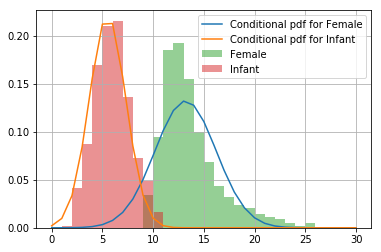

In [96]:
# Put your code here
meanfemale = 13.198289
stdfemale = np.sqrt(9.096059)
meaninfant = 5.509449
stdinfant = np.sqrt(3.263504)
n_type = data.groupby('Type')['No of Rings'].count()
p_type = n_type/2556 #from data.count()
x = np.arange(0, 30+1, 1)

yfemale = scipy.stats.norm.pdf(x, meanfemale, stdfemale)
yinfant = scipy.stats.norm.pdf(x, meaninfant, stdinfant)
# g_r = yfemale * p_type[0] + yinfant*p_type[1]

fig,ax = plt.subplots()
ax.plot(x, yfemale, label = 'Conditional pdf for Female')
ax.plot(x, yinfant, label = 'Conditional pdf for Infant')
ax.legend()

for name, group in groups:
    group.hist(bins = b, density = True, label = name, alpha = 0.5, ax=ax)
    
    ax.legend()

**Your analysis on Part f:** Fits quite well for the infant type, but only slightly for the female type.

**Part g:** Assume that $P[Female] =  P[Infant] = 0.5$. Use the total probability theorem to combine the two conditional densities to obtain a new model distribution for the number of rings, $g_R (r)$. Compare the plot of $g_R (r)$ with the normalized histogram in **Part a** by plotting both in the same figure for r from 0 to 30. How does this compare with the single Gaussian assumption in **Part c**?

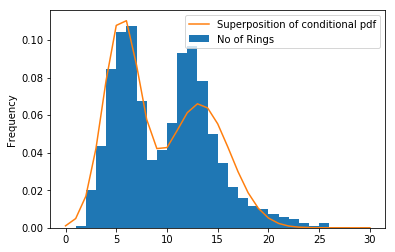

In [95]:
# Put your code here
# g_r = yfemale * p_type[0] + yinfant*p_type[1]
g_r = yfemale * 0.5 + yinfant* 0.5
fig,ax = plt.subplots()
Y = data.plot.hist(bins = np.arange(0,30+1,1), density = True, ax=ax)
ax.plot(x, g_r, label = 'Superposition of conditional pdf')
ax.legend()

**Your analysis on Part g:** Fits much better than assumption in part c, because this is the superposition of two Gaussian conditional pdf.